In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv("/content/Churn_Modelling.csv")

In [ ]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [ ]:
data.isnull().sum()

,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


In [ ]:
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [ ]:
data = data.drop(['CreditScore', 'Geography', 'Gender'],axis=1)
data

,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,42,2,0.00,1,1,1,101348.88,1
1,41,1,83807.86,1,0,1,112542.58,0
2,42,8,159660.80,3,1,0,113931.57,1
3,39,1,0.00,2,0,0,93826.63,0
4,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...
9995,39,5,0.00,2,1,0,96270.64,0
9996,35,10,57369.61,1,1,1,101699.77,0
9997,36,7,0.00,1,0,1,42085.58,1
9998,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
# Convert categorical variables into dummy/indicator variables
data_encoded = pd.get_dummies(data, drop_first=True)

# Convert the resulting columns to integer type
data_encoded = data_encoded.apply(pd.to_numeric, downcast='integer')

# Display the first few rows of the modified data
data_encoded.head()


,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,42,2,0.00,1,1,1,101348.88,1
1,41,1,83807.86,1,0,1,112542.58,0
2,42,8,159660.80,3,1,0,113931.57,1
3,39,1,0.00,2,0,0,93826.63,0
4,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


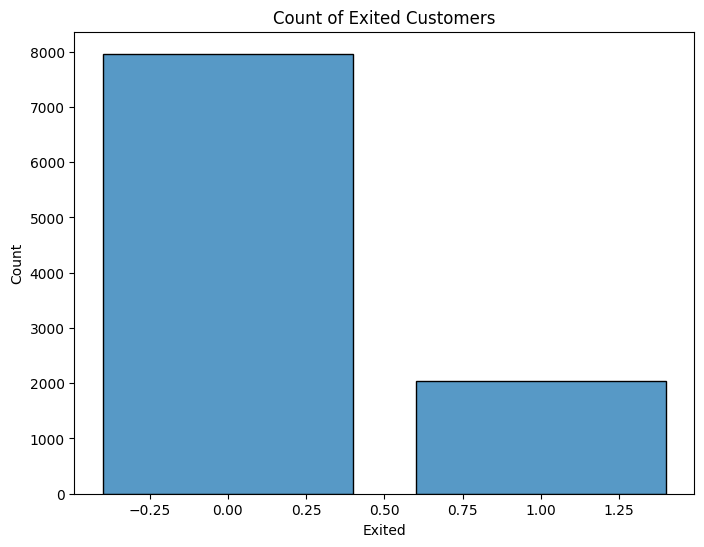

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the count of 'Exited' column
plt.figure(figsize=(8, 6))
ax = sns.histplot(data=data, x='Exited', discrete=True, shrink=0.8)
plt.title('Count of Exited Customers')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.show()


In [ ]:
# Separate features and target variable
features = data.drop('Exited',axis=1)
target = data['Exited']


In [ ]:
!pip install imblearn

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
# Splitting data into training and testing sets
X_train_set, X_test_set, y_train_set, y_test_set = train_test_split(features, target, test_size=0.1, random_state=42)

# Print the shapes of the train and test sets
print(f"Training Set Shape: {X_train_set.shape}")
print(f"Testing Set Shape: {X_test_set.shape}")

# Renaming variables back to X_train, X_test, y_train, and y_test
X_train, X_test = X_train_set, X_test_set
y_train, y_test = y_train_set, y_test_set


Training Set Shape: (9000, 7)
Testing Set Shape: (1000, 7)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler_model = StandardScaler()

# Fit the scaler on training data and transform both training and testing sets
X_train_normalized = scaler_model.fit_transform(X_train)
X_test_normalized = scaler_model.transform(X_test)


In [ ]:
X_train_normalized

array([[ 0.19687202, -0.00234647,  0.24969536, ...,  0.64807894,
         0.96892697, -1.24141718],
       [ 1.33803657,  1.03625698,  0.61193018, ...,  0.64807894,
         0.96892697, -0.83893014],
       [-0.08841912,  1.03625698, -1.21736876, ..., -1.54302191,
        -1.03206953, -0.35176236],
       ...,
       [-0.08841912, -1.38715108, -1.21736876, ..., -1.54302191,
        -1.03206953, -0.13276205],
       [ 0.38706611,  1.03625698,  1.82888182, ...,  0.64807894,
        -1.03206953, -0.04086253],
       [ 1.14784248, -1.38715108,  1.15122638, ...,  0.64807894,
         0.96892697, -0.80427439]])

In [ ]:
threshold = 0.5
y_train_classified = [1 if value > threshold else 0 for value in y_train]
LR = LogisticRegression()
LR.fit(X_train_normalized, y_train_classified)

LogisticRegression()

In [ ]:
y_test_classified = [1 if value > threshold else 0 for value in y_test]
accuracy1 = LR.score(X_test_normalized, y_test_classified)
print("Model Accuracy:", accuracy1)

Model Accuracy: 0.815


In [ ]:
from sklearn import svm
threshold = 0.5
y_train_classified = [1 if value > threshold else 0 for value in y_train]
svm = svm.SVC()
svm.fit(X_train_normalized, y_train_classified)

SVC()

In [ ]:
y_test_classified = [1 if value > threshold else 0 for value in y_test]
accuracy2 = svm.score(X_test_normalized, y_test_classified)
print("Model Accuracy:", accuracy2)

Model Accuracy: 0.862


In [ ]:
threshold = 0.5
y_train_classified = [1 if value > threshold else 0 for value in y_train]
rf = RandomForestClassifier()
rf.fit(X_train_normalized, y_train_classified)

RandomForestClassifier()

In [ ]:
y_test_classified = [1 if value > threshold else 0 for value in y_test]
accuracy3 = rf.score(X_test_normalized, y_test_classified)
print("Model Accuracy:", accuracy3)

Model Accuracy: 0.847


In [ ]:
threshold = 0.5
y_train_classified = [1 if value > threshold else 0 for value in y_train]
dt = DecisionTreeClassifier()
dt.fit(X_train_normalized, y_train_classified)

DecisionTreeClassifier()

In [ ]:
y_test_classified = [1 if value > threshold else 0 for value in y_test]
accuracy4 = dt.score(X_test_normalized, y_test_classified)
print("Model Accuracy:", accuracy4)

Model Accuracy: 0.777


In [ ]:
threshold = 0.5
y_train_classified = [1 if value > threshold else 0 for value in y_train]
KNN = KNeighborsClassifier()
KNN.fit(X_train_normalized, y_train_classified)

KNeighborsClassifier()

In [ ]:
y_test_classified = [1 if value > threshold else 0 for value in y_test]
accuracy5 = KNN.score(X_test_normalized, y_test_classified)
print("Model Accuracy:", accuracy5)

Model Accuracy: 0.831


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
threshold = 0.5
y_train_classified = [1 if value > threshold else 0 for value in y_train]
GBC = GradientBoostingClassifier()
GBC.fit(X_train_normalized, y_train_classified)

GradientBoostingClassifier()

In [ ]:
y_test_classified = [1 if value > threshold else 0 for value in y_test]
accuracy6 = GBC.score(X_test_normalized, y_test_classified)
print("Model Accuracy:", accuracy6)

Model Accuracy: 0.868


In [ ]:
performance_summary = pd.DataFrame({
    'Model':['LR','svm','KNN','dt','rf','GBC'],
    'ACC':[accuracy1,
           accuracy2,
           accuracy3,
           accuracy4,
           accuracy5,
           accuracy6
          ]
})
performance_summary

,Model,ACC
0,LR,0.815
1,svm,0.862
2,KNN,0.847
3,dt,0.777
4,rf,0.831
5,GBC,0.868
